In [ ]:
# Install required libraries
!pip install transformers pandas torch

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Duolingo/duolingo_sentiment_individual_opinions.csv"
opinions_df = pd.read_csv(file_path)

# Load the pretrained sentiment model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"  # Or "yiyanghkust/finbert-tone" for financial sentiment
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Initialize sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, return_all_scores=True)

# Function to split long text into chunks
def split_text_into_chunks(text, max_tokens=512):
    words = text.split()
    chunks = [" ".join(words[i:i + max_tokens]) for i in range(0, len(words), max_tokens)]
    return chunks

# Perform sentiment analysis with aggregation
def analyze_sentiment(text):
    try:
        # Split text into manageable chunks
        chunks = split_text_into_chunks(text, max_tokens=512)

        # Analyze each chunk and aggregate probabilities
        all_scores = []
        for chunk in chunks:
            scores = sentiment_pipeline(chunk)
            all_scores.append(scores[0])  # Collect probabilities for 'positive', 'negative', 'neutral'

        # Aggregate probabilities
        aggregated_scores = {
            'positive': np.mean([score[1]['score'] for score in all_scores]),
            'negative': np.mean([score[0]['score'] for score in all_scores]),
            'neutral': np.mean([score[2]['score'] for score in all_scores]),
        }

        # Determine final sentiment based on highest aggregated score
        final_sentiment = max(aggregated_scores, key=aggregated_scores.get)
        return final_sentiment
    except Exception as e:
        print(f"Error processing text: {e}")
        return "neutral"  # Fallback in case of an error

# Apply sentiment analysis to the 'text' column
opinions_df['sentiment'] = opinions_df['text'].apply(analyze_sentiment)

# Save the dataset with the sentiment results
output_file_path = "duolingo_high_accuracy_sentiment_analysis.csv"
opinions_df.to_csv(output_file_path, index=False)

print(f"Sentiment analysis complete! Results saved to: {output_file_path}")




KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
opinions_df.to_csv("partial_sentiment_results.csv", index=False)


NameError: name 'opinions_df' is not defined

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# After mounting, you can access your Google Drive files like this:
# '/content/drive/My Drive'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/content/drive/MyDrive/Colab Notebooks/Duolingo/partial_sentiment_results.csv"
df = pd.read_csv(file_path)

# Define thresholds for sentiment classification
def classify_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Create a new column for categorized sentiment
df['sentiment_category'] = df['sentiment_score'].apply(classify_sentiment)




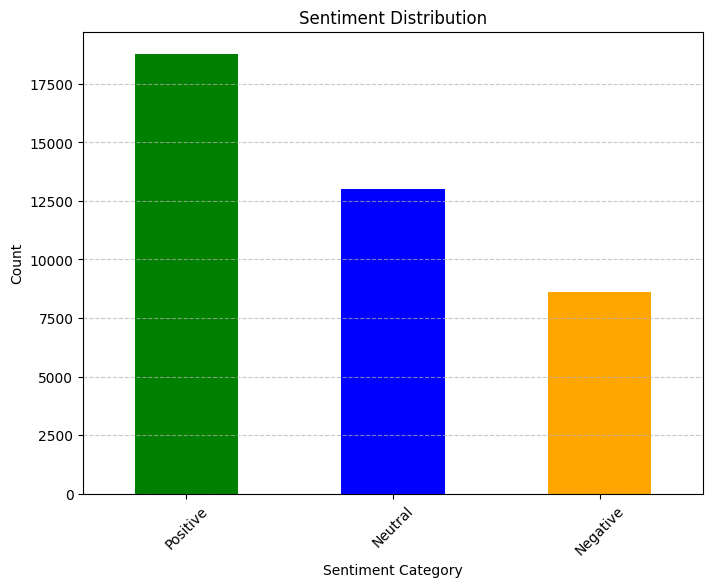

In [ ]:
# Count the number of occurrences for each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'orange'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


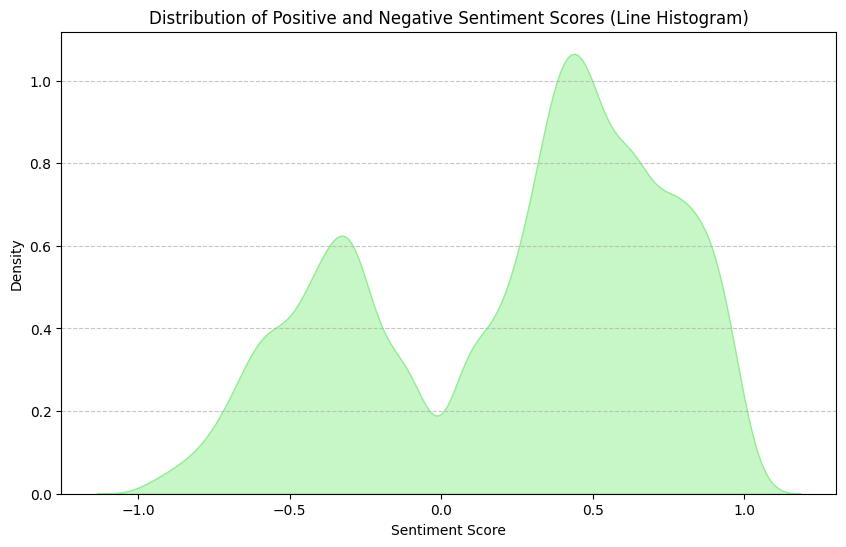

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out neutral values (assuming neutral scores are between -0.05 and 0.05)
filtered_df = df[(df['sentiment_score'] > 0.05) | (df['sentiment_score'] < -0.05)]

# Plot line histogram using KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_df['sentiment_score'], fill=True, color="lightgreen", alpha=0.5)
plt.title("Distribution of Positive and Negative Sentiment Scores (Line Histogram)")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





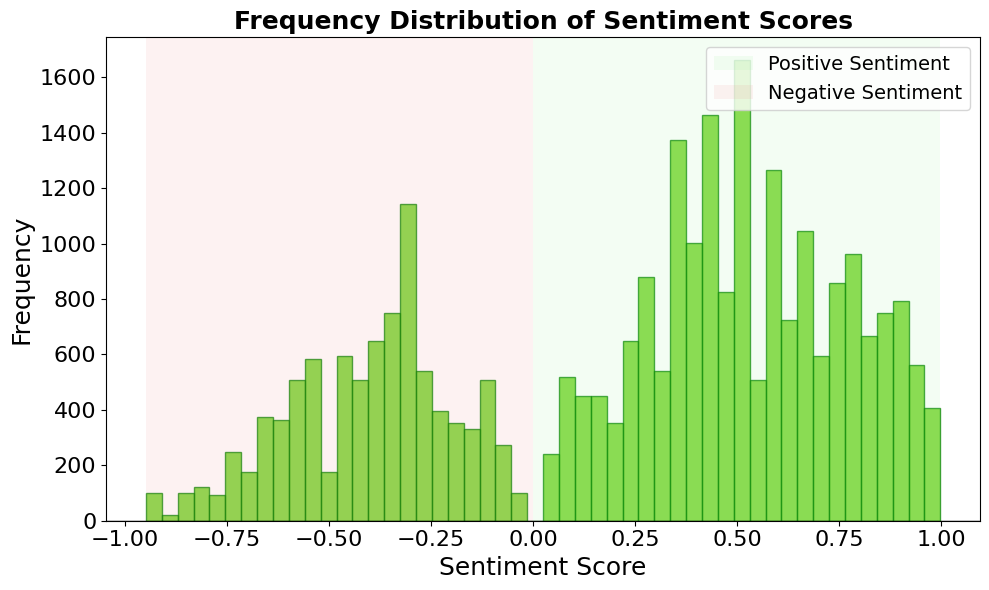

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram with smaller bins
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['sentiment_score'], bins=50, color="#58cc02", edgecolor="green", alpha=0.7)

# Add labels and title with increased font size
plt.title("Frequency Distribution of Sentiment Scores", fontsize=18, fontweight="bold")
plt.xlabel("Sentiment Score", fontsize=18)
plt.ylabel("Frequency", fontsize=18)

# Indicate positive and negative areas
plt.axhline(y=0, color='black', linewidth=1)  # Add a line at y=0 for clarity
plt.axvspan(0, max(filtered_df['sentiment_score']), facecolor='lightgreen', alpha=0.1, label="Positive Sentiment")
plt.axvspan(min(filtered_df['sentiment_score']), 0, facecolor='lightcoral', alpha=0.1, label="Negative Sentiment")

# Customize tick labels with larger font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add legend for the positive/negative indication with larger font size
plt.legend(fontsize=14, loc="upper right")

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()





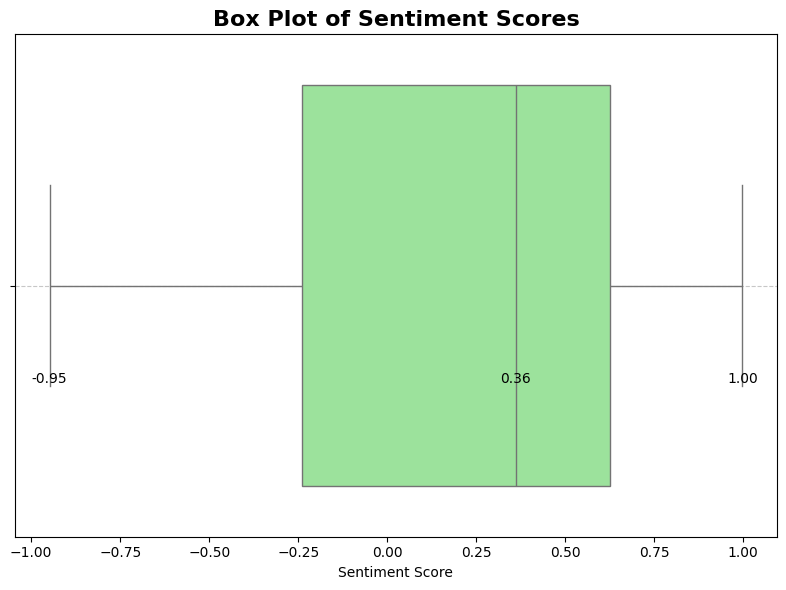

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x=filtered_df['sentiment_score'], color="lightgreen")

# Calculate statistics
stats = filtered_df['sentiment_score'].describe()

# Extract relevant values
min_val = stats['min']  # Minimum
q1 = stats['25%']       # First quartile (bottom of the box)
median_val = stats['50%']  # Median (middle line in the box)
q3 = stats['75%']       # Third quartile (top of the box)
max_val = stats['max']  # Maximum

# Add labels to the plot
plt.text(min_val, 0.2, f"{min_val:.2f}", ha='center', va='bottom', fontsize=10, color='black')
plt.text(median_val, 0.2, f"{median_val:.2f}", ha='center', va='bottom', fontsize=10, color='black')
plt.text(max_val, 0.2, f"{max_val:.2f}", ha='center', va='bottom', fontsize=10, color='black')

# Title and labels
plt.title("Box Plot of Sentiment Scores", fontsize=16, fontweight='bold')
plt.xlabel("Sentiment Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<ipython-input-12-4ecac0664ab7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment_category'] = filtered_df['sentiment_score'].apply(


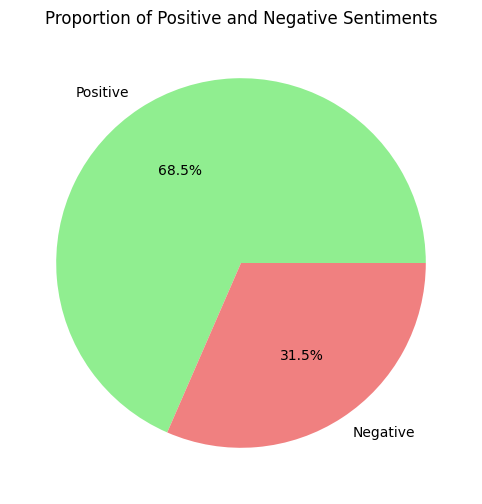

In [ ]:
# Categorize sentiments
filtered_df['sentiment_category'] = filtered_df['sentiment_score'].apply(
    lambda x: "Positive" if x > 0.05 else "Negative"
)
sentiment_counts = filtered_df['sentiment_category'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title("Proportion of Positive and Negative Sentiments")
plt.ylabel("")  # Remove default ylabel
plt.show()


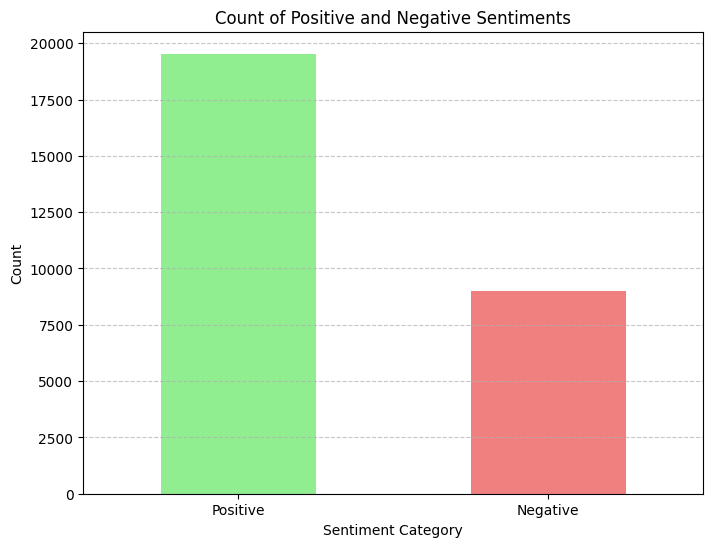

In [ ]:
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title("Count of Positive and Negative Sentiments")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<ipython-input-53-f156aabf8062>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment_category'] = filtered_df['sentiment_score'].apply(categorize_sentiment)


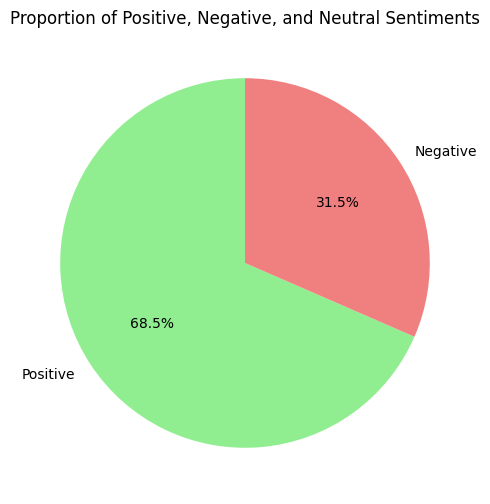

In [ ]:
# Categorize sentiments including neutral
def categorize_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

filtered_df['sentiment_category'] = filtered_df['sentiment_score'].apply(categorize_sentiment)
sentiment_counts = filtered_df['sentiment_category'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral', 'lightblue'],  # Positive, Negative, Neutral
    startangle=90
)
plt.title("Proportion of Positive, Negative, and Neutral Sentiments")
plt.ylabel("")  # Remove default ylabel
plt.show()




In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Duolingo/partial_sentiment_results.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Define keywords to identify posts and comments related to paying for Duolingo Max
payment_keywords = ["purchase", "pay", "cost", "worth", "subscription", "price", "afford", "buy"]

# Filter posts and comments related to payment
df['is_payment_related'] = df['text'].apply(
    lambda x: any(keyword in x.lower() for keyword in payment_keywords) if isinstance(x, str) else False
)

# Extract only rows (posts and comments) related to payment
payment_related_df = df[df['is_payment_related']]

# Expanded keywords for positive and negative responses
positive_keywords = [
    "yes", "love", "worth", "amazing", "value", "great", "good", "affordable",
    "reasonable", "awesome", "buying", "helpful", "convenient", "improve", "effective"
]
negative_keywords = [
    "no", "not", "expensive", "waste", "hate", "bad", "overpriced", "unaffordable",
    "useless", "too much", "irrelevant", "pointless", "ridiculous", "unnecessary", "dislike"
]

# Classify text (both posts and comments) as positive, negative, or neutral (0)
def classify_response(text, sentiment_score):
    if any(word in text.lower() for word in positive_keywords):
        return "Positive"
    elif any(word in text.lower() for word in negative_keywords):
        return "Negative"
    # No conclusive evidence: return 0
    return 0

# Apply classification to payment-related posts and comments
payment_related_df['willing_to_pay'] = payment_related_df.apply(
    lambda row: classify_response(row['text'], row['sentiment_score']), axis=1
)

# Save the analysis to a new CSV file
output_file_path = "willing_to_pay_posts_and_comments_analysis.csv"  # Output file path in the current directory
payment_related_df.to_csv(output_file_path, index=False)

# Confirm file creation
print(f"Analysis complete. Results saved to: {output_file_path}")

# Optionally display the first few rows for verification
print(payment_related_df.head())



Analysis complete. Results saved to: willing_to_pay_posts_and_comments_analysis.csv
                                                 text     type  \
0           Did anyone purchase the Duolingo Max? nan     post   
3   I know Duo is using a lot of AI already, but I...  comment   
4   Yes!  I love it!  The Role Play is amazing!  F...  comment   
5   I have the Android beta and saw some duolingo ...  comment   
19  I’m interested in paying someone for a slot on...  comment   

    sentiment_score              date  is_payment_related willing_to_pay  
0            0.0000  31-08-2024 22:00                True              0  
3            0.1139  31-08-2024 22:00                True       Negative  
4            0.9322  31-08-2024 22:00                True       Positive  
5           -0.1027  31-08-2024 22:00                True       Negative  
19           0.4019  31-08-2024 22:00                True              0  


<ipython-input-14-38efc546c0b6>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_related_df['willing_to_pay'] = payment_related_df.apply(


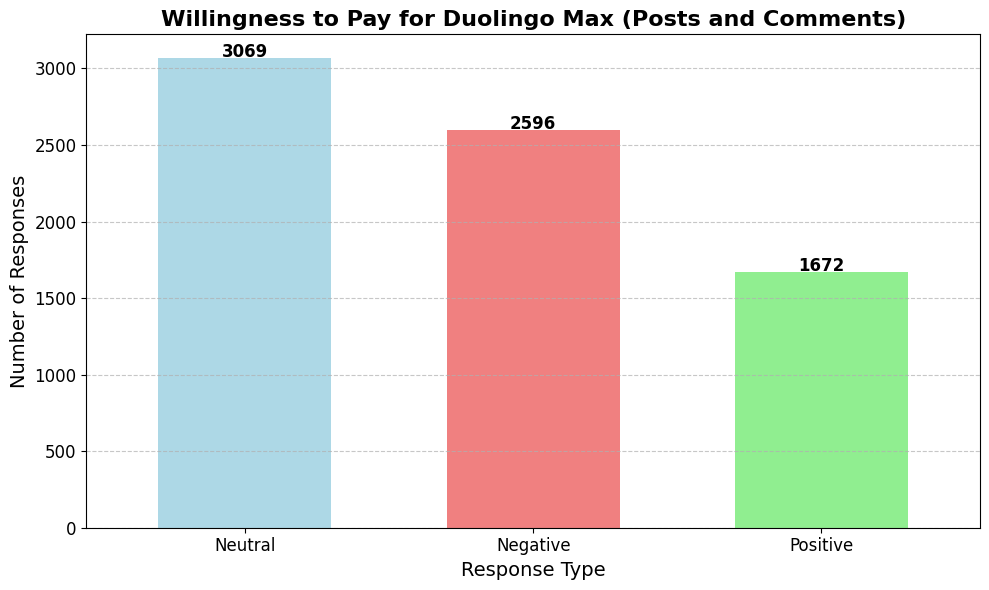

In [ ]:
import matplotlib.pyplot as plt

# Count the responses for visualization
response_counts = payment_related_df['willing_to_pay'].value_counts()

# Map integer 0 to 'Neutral' for better visualization
response_mapping = {0: "Neutral", "Positive": "Positive", "Negative": "Negative"}
response_counts.index = [response_mapping.get(idx, idx) for idx in response_counts.index]

# Plot a bar chart
plt.figure(figsize=(10, 6))
colors = ['lightblue','lightcoral', 'lightgreen']  # Colors for Neutral, Positive, Negative
response_counts.plot(kind='bar', color=colors[:len(response_counts)], width=0.6)

# Add chart elements
plt.title("Willingness to Pay for Duolingo Max (Posts and Comments)", fontsize=16, fontweight='bold')
plt.xlabel("Response Type", fontsize=14)
plt.ylabel("Number of Responses", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar heights for clarity
for index, value in enumerate(response_counts):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12, fontweight='bold')

# Display the chart
plt.tight_layout()
plt.show()




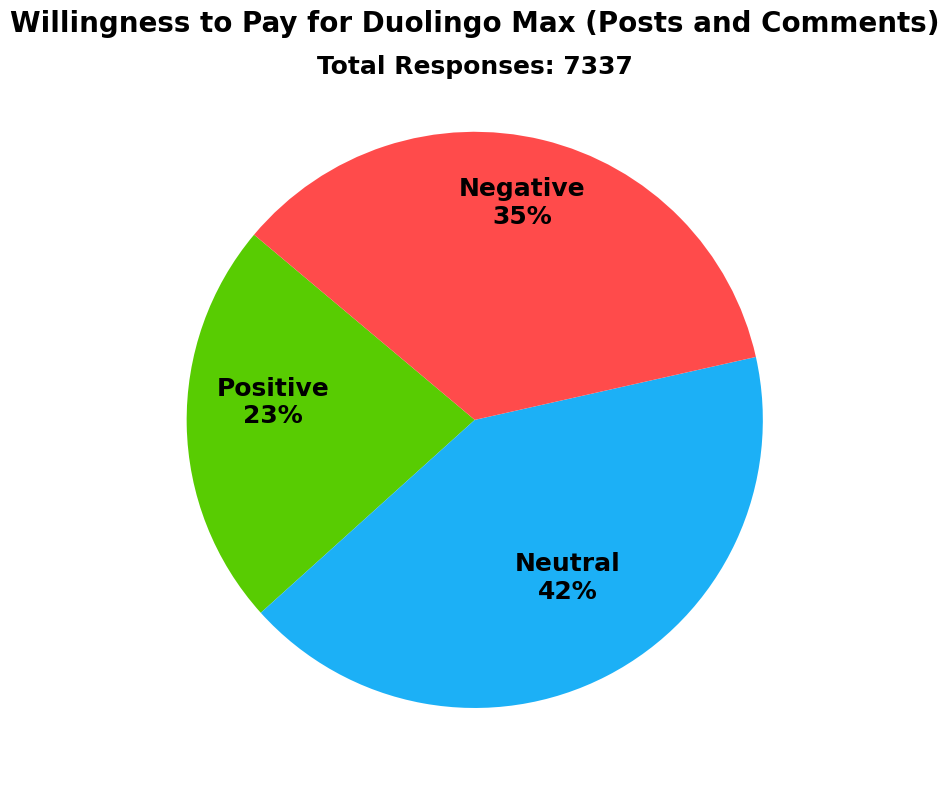

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  # Use numpy for cos and sin

# Count the responses for visualization
response_counts = payment_related_df['willing_to_pay'].value_counts()

# Map integer 0 to 'Neutral' for better visualization
response_mapping = {0: "Neutral", "Positive": "Positive", "Negative": "Negative"}
response_counts.index = [response_mapping.get(idx, idx) for idx in response_counts.index]

# Define Duolingo's brand-inspired colors
colors = ['#58cc02', '#1cb0f6', '#ff4b4b']  # Positive (Green), Neutral (Light Green), Negative (Dark Green)

# Reorder responses and colors to ensure alignment
response_order = ["Positive", "Neutral", "Negative"]
response_counts = response_counts.reindex(response_order)
colors = [colors[response_order.index(response)] for response in response_counts.index]

# Create the pie chart
plt.figure(figsize=(10, 8))
wedges, autotexts = plt.pie(
    response_counts,
    labels=None,  # No default labels, custom labels will be added inside
    autopct=None,
    startangle=140,
    colors=colors,
    wedgeprops={'linewidth': 0}  # Remove pie chart boundaries
)

# Add response type labels and percentages inside the pie slices
for i, (wedge, count) in enumerate(zip(wedges, response_counts)):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Find the middle angle of the wedge
    x = 0.7 * wedge.r * np.cos(angle * (np.pi / 180))  # X position inside the slice
    y = 0.7 * wedge.r * np.sin(angle * (np.pi / 180))  # Y position inside the slice
    plt.text(
        x,
        y,
        f"{response_counts.index[i]}\n{count / response_counts.sum() * 100:.0f}%",  # Add label and %
        ha="center",
        fontsize=18,
        fontweight="bold",
        color="black"
    )

# Move the total number of responses to the top of the chart
total_responses = response_counts.sum()
plt.text(
    0, 1.2, f"Total Responses: {total_responses}", ha='center', fontsize=18, fontweight='bold'
)

# Title and professional formatting
plt.title("Willingness to Pay for Duolingo Max (Posts and Comments)", fontsize=20, fontweight='bold', pad=20)

# Adjust layout for clarity
plt.tight_layout()

# Display the chart
plt.show()







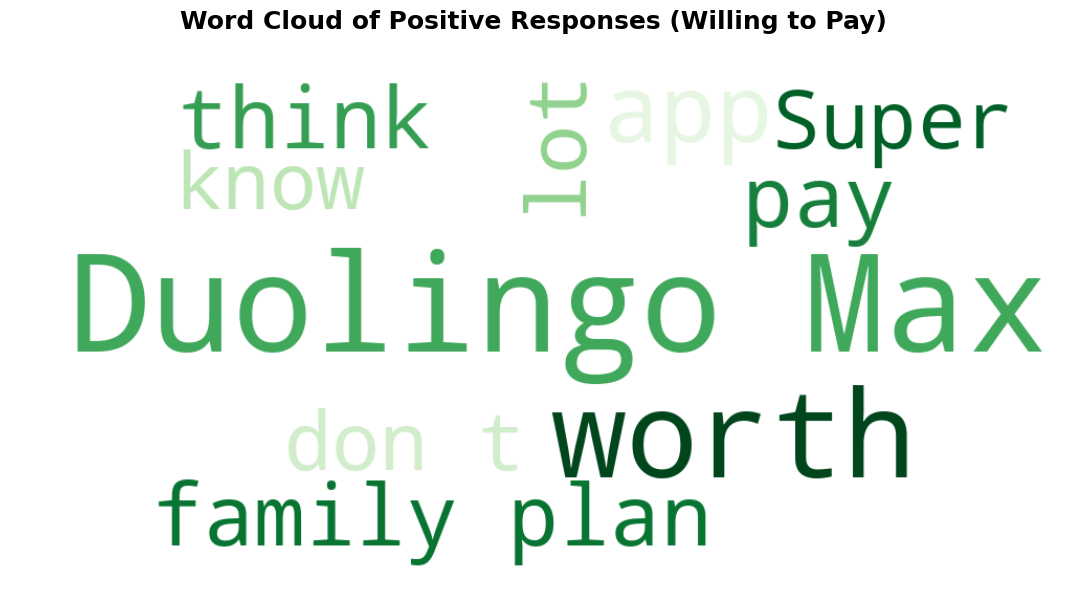

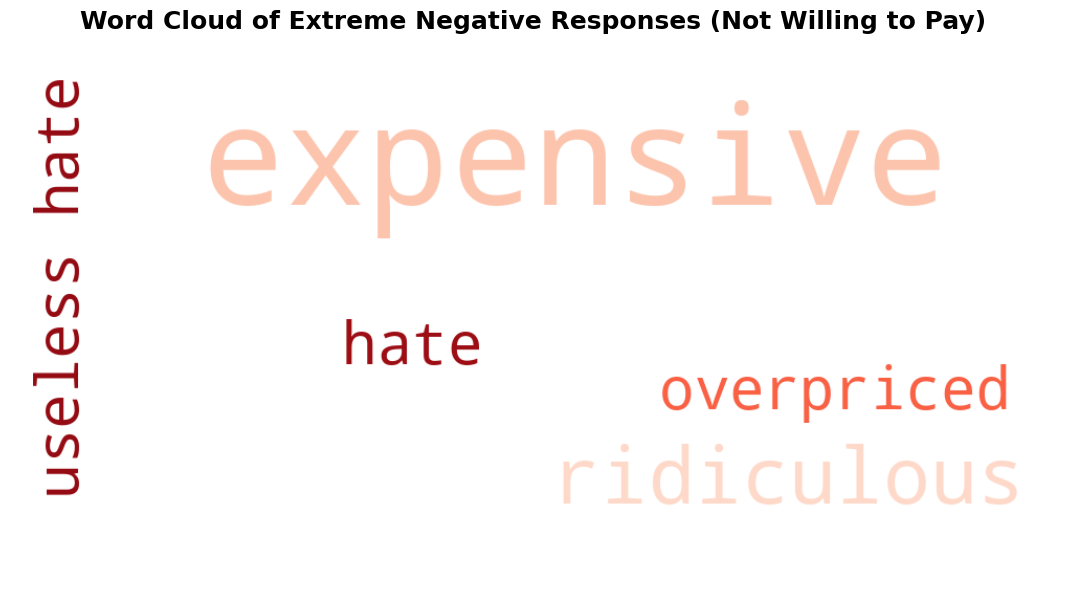

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the dataset for positive and negative responses
positive_responses = payment_related_df[payment_related_df['willing_to_pay'] == "Positive"]['text']
negative_responses = payment_related_df[payment_related_df['willing_to_pay'] == "Negative"]['text']

# Combine text for word clouds
positive_text = " ".join(positive_responses.dropna())
negative_text = " ".join(negative_responses.dropna())

# Highlight extreme negative words
extreme_negative_keywords = ["expensive", "waste", "hate", "overpriced", "useless", "pointless", "ridiculous", "unnecessary", "dislike"]
extreme_negative_text = " ".join([word for word in negative_text.split() if word.lower() in extreme_negative_keywords])

# Generate the word clouds
positive_wordcloud = WordCloud(
    width=1000, height=500, background_color='white', colormap='Greens',
    max_words=10, contour_width=1, contour_color='black'
).generate(positive_text)

negative_wordcloud = WordCloud(
    width=1000, height=500, background_color='white', colormap='Reds',
    max_words=10, contour_width=1, contour_color='black'
).generate(extreme_negative_text)

# Plot Positive Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Responses (Willing to Pay)", fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Plot Negative Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Extreme Negative Responses (Not Willing to Pay)", fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Load the previously saved dataset with willingness-to-pay analysis
file_path = "/content/drive/MyDrive/Colab Notebooks/Duolingo/willing_to_pay_posts_and_comments_analysis.csv"  # Replace with your actual file path
payment_related_df = pd.read_csv(file_path)

# Count the number of responses for each willingness-to-pay category
response_counts = payment_related_df['willing_to_pay'].value_counts()

# Display the counts for Positive, Negative, and Neutral responses
print("Response Counts:")
print(response_counts)


Response Counts:
willing_to_pay
0           3069
Negative    2596
Positive    1672
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load the datasets
file_path_general = "/content/drive/MyDrive/Colab Notebooks/Duolingo/partial_sentiment_results.csv"  # General sentiment file
file_path_payment = "/content/drive/MyDrive/Colab Notebooks/Duolingo/willing_to_pay_posts_and_comments_analysis.csv"
df_general = pd.read_csv(file_path_general)
df_payment = pd.read_csv(file_path_payment)

# Process General Sentiment
def classify_general_sentiment(score):
    if score > 0.5:
        return "Positive"
    elif score < -0.5:
        return "Negative"
    else:
        return "Neutral"

df_general['sentiment_category'] = df_general['sentiment_score'].apply(classify_general_sentiment)

# General Sentiment Pivot Table
general_pivot = df_general.pivot_table(
    index='sentiment_category',
    values='sentiment_score',
    aggfunc='count'
).rename(columns={'sentiment_score': 'Count'})

# Add Total Row
general_pivot.loc['Total'] = general_pivot['Count'].sum()

# Display General Sentiment Pivot Table
print("Pivot Table: General Sentiment")
print(general_pivot, "\n")

# Process Willingness to Pay
df_payment['willing_to_pay'] = df_payment['willing_to_pay'].fillna("NaN")

# Willingness to Pay Pivot Table
willingness_pivot = df_payment.pivot_table(
    index='willing_to_pay',
    values='text',
    aggfunc='count'
).rename(columns={'text': 'Count'})

# Add Total Row
willingness_pivot.loc['Total'] = willingness_pivot['Count'].sum()

# Display Willingness to Pay Pivot Table
print("Pivot Table: Willingness to Pay")
print(willingness_pivot, "\n")


Pivot Table: General Sentiment
                    Count
sentiment_category       
Negative             2772
Neutral             27379
Positive            10241
Total               40392 

Pivot Table: Willingness to Pay
                Count
willing_to_pay       
0                3069
Negative         2596
Positive         1672
Total            7337 



Pivot Table: General Sentiment
                    Count
sentiment_category       
Negative             8602
Neutral             13002
Positive            18788
Total               40392 

Pivot Table: Willingness to Pay
                Count
willing_to_pay       
0                3069
Negative         2596
Positive         1672
Total            7337 



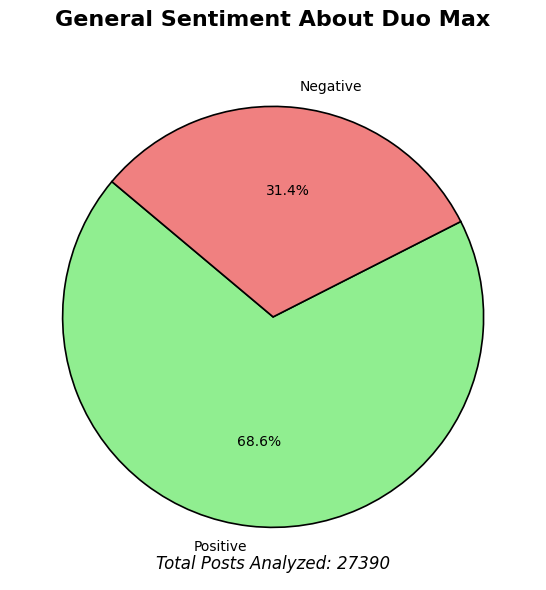

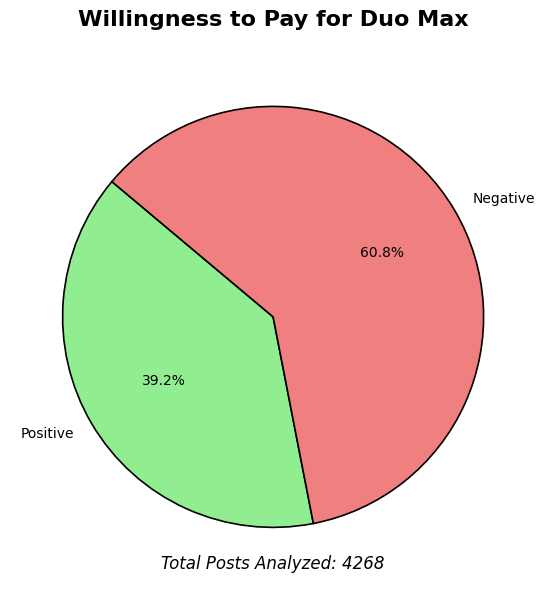

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path_general = "/content/drive/MyDrive/Colab Notebooks/Duolingo/partial_sentiment_results.csv"  # General sentiment file
file_path_payment = "/content/drive/MyDrive/Colab Notebooks/Duolingo/willing_to_pay_posts_and_comments_analysis.csv"
df_general = pd.read_csv(file_path_general)
df_payment = pd.read_csv(file_path_payment)

# Process General Sentiment
def classify_general_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df_general['sentiment_category'] = df_general['sentiment_score'].apply(classify_general_sentiment)

# General Sentiment Pivot Table
general_pivot = df_general.pivot_table(
    index='sentiment_category',
    values='sentiment_score',
    aggfunc='count'
).rename(columns={'sentiment_score': 'Count'})

# Add Total Row
general_pivot.loc['Total'] = general_pivot['Count'].sum()

# Display General Sentiment Pivot Table
print("Pivot Table: General Sentiment")
print(general_pivot, "\n")

# Process Willingness to Pay
df_payment['willing_to_pay'] = df_payment['willing_to_pay'].fillna("NaN")

# Willingness to Pay Pivot Table
willingness_pivot = df_payment.pivot_table(
    index='willing_to_pay',
    values='text',
    aggfunc='count'
).rename(columns={'text': 'Count'})

# Add Total Row
willingness_pivot.loc['Total'] = willingness_pivot['Count'].sum()

# Display Willingness to Pay Pivot Table
print("Pivot Table: Willingness to Pay")
print(willingness_pivot, "\n")

# Filter Positive and Negative for General Sentiment Pie Chart
general_filtered = general_pivot.loc[["Positive", "Negative"]]
general_total = general_filtered["Count"].sum()

# Filter Positive and Negative for Willingness to Pay Pie Chart
willingness_filtered = willingness_pivot.loc[["Positive", "Negative"]]
willingness_total = willingness_filtered["Count"].sum()

# Consistent Colors
colors = ['lightgreen', 'lightcoral']  # Light green for Positive, Light red for Negative

# Pie Chart for General Sentiment
plt.figure(figsize=(8, 6))
plt.pie(
    general_filtered["Count"],
    labels=general_filtered.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
)
plt.title("General Sentiment About Duo Max", fontsize=16, fontweight='bold', pad=20)
plt.text(0, -1.2, f"Total Posts Analyzed: {general_total}", ha='center', fontsize=12, fontstyle='italic')
plt.tight_layout()
plt.show()

# Pie Chart for Willingness to Pay
plt.figure(figsize=(8, 6))
plt.pie(
    willingness_filtered["Count"],
    labels=willingness_filtered.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
)
plt.title("Willingness to Pay for Duo Max", fontsize=16, fontweight='bold', pad=20)
plt.text(0, -1.2, f"Total Posts Analyzed: {willingness_total}", ha='center', fontsize=12, fontstyle='italic')
plt.tight_layout()
plt.show()


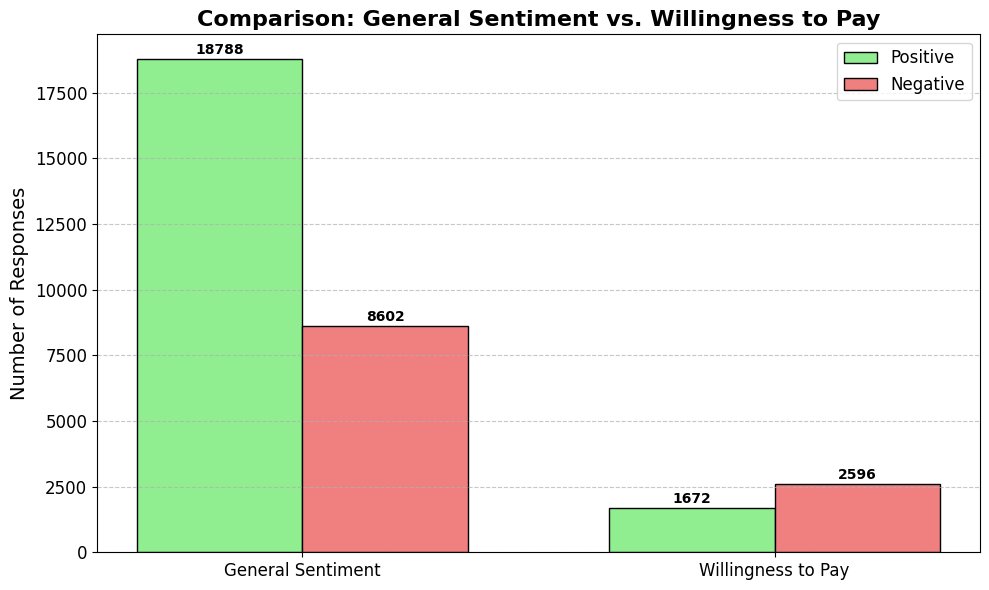

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
categories = ['General Sentiment', 'Willingness to Pay']
positive_values = [general_pivot.loc['Positive', 'Count'], willingness_pivot.loc['Positive', 'Count']]
negative_values = [general_pivot.loc['Negative', 'Count'], willingness_pivot.loc['Negative', 'Count']]

# Bar locations and width
x = np.arange(len(categories))  # Label locations
width = 0.35  # Width of the bars

# Initialize the plot
plt.figure(figsize=(10, 6))

# Bars for Positive values
plt.bar(x - width/2, positive_values, width, label='Positive', color='lightgreen', edgecolor='black')

# Bars for Negative values
plt.bar(x + width/2, negative_values, width, label='Negative', color='lightcoral', edgecolor='black')

# Add value annotations above the bars
for i, value in enumerate(positive_values):
    plt.text(i - width/2, value + 200, f"{value}", ha='center', fontsize=10, fontweight='bold')

for i, value in enumerate(negative_values):
    plt.text(i + width/2, value + 200, f"{value}", ha='center', fontsize=10, fontweight='bold')

# Customize the chart
plt.title("Comparison: General Sentiment vs. Willingness to Pay", fontsize=16, fontweight='bold')
plt.ylabel("Number of Responses", fontsize=14)
plt.xticks(x, categories, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
